In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Dado 3 puntos en el plano y tomando el primer punto como el origen P0 determinar si el punto P2 esta girado a la derecha o izquierda respecto a P1


In [2]:
def cross_product(p0,p1,p2):
    x1 = p1[0] - p0[0]
    y1 = p1[1] - p0[1]
    x2 = p2[0] - p0[0]
    y2 = p2[1] - p0[1]
    
    return (x1*y2) - (x2*y1)

In [3]:
p0 = (3,5)
p1 = (1,1)
p2 = (2,2)
cross_product(p0,p1,p2)

2

In [4]:
def orientation(p0,p1,p2):
    giro = cross_product(p0,p1,p2)
    
    if giro > 0 :
        print ("p2 se encuentra a la derecha respecto a p0p1 ")
    elif giro < 0:
        print ("p2 se encuentra a la izquierda respecto a p0p1")
    else:
        print(" los segmentos de linea son colineales entre si ")
        
    plt.plot([p0[0],p1[0]],[p0[1],p1[1]], "b", label= "P0P1")
    plt.plot([p1[0],p2[0]],[p1[1],p2[1]], "r", label= "P1P2")
    plt.scatter([p0[0],p1[0],p2[0]],[p0[1],p1[1],p2[1]])    
    plt.legend()
    plt.show()

p2 se encuentra a la derecha respecto a p0p1 


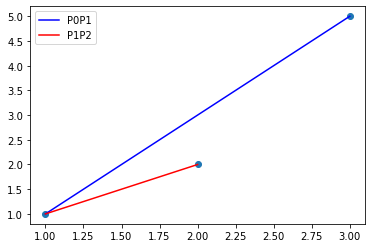

In [5]:
orientation(p0,p1,p2)

 ### given two line segments you need to determinate if that segments intersect or not?


In [6]:
def on_segment(p0,p1,p2):
    xi,yi = p0
    xj,yj = p1
    xk,yk = p2
    if ((min(xi,xj) <= xk) and (max(xi,xj)>=xk)) and ((min(yi,yj) <= yk) and (max(yi,yj)>=yk)):
        return True
    else:
        return False
    
def pintar_segmentos(p1,p2,p3,p4,pin = None):
    plt.plot([p1[0],p2[0]],[p1[1],p2[1]], "b",label = 'P1P2')
    plt.plot([p3[0], p4[0]], [p3[1], p4[1]], 'g', label='P3P4')
    plt.scatter([p1[0], p2[0], p3[0],p4[0]], [p1[1], p2[1], p3[1],p4[1]])
    plt.annotate('P1', (p1[0], p1[1]), textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=12)
    plt.annotate('P2', (p2[0], p2[1]), textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=12)
    plt.annotate('P3', (p3[0], p3[1]), textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=12)
    plt.annotate('P4', (p4[0], p4[1]), textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=12)
    if pin is not None:
        plt.scatter([pin[0]],[pin[1]])
        plt.annotate('intersec', (pin[0], pin[1]), textcoords="offset points", xytext=(-15,-10), ha='center', fontsize=12)
    
    plt.legend()
    plt.plot()
    
def intersection(p1,p2,p3,p4):
    
    d1 = cross_product(p1,p3,p4)
    d2 = cross_product(p2,p3,p4)
    
    d3 = cross_product(p3,p1,p2)
    d4 = cross_product(p4,p1,p2)
    
    pintar_segmentos(p1,p2,p3,p4)
    
    if d1*d2 < 0 and d3*d4 <0:
        return True,print("los segmentos se cruzan")
    
    elif d1 == 0 and on_segment(p3,p4,p1):
        return True,print("los segmentos se cruzan pero no se atraviezan")
    elif d2 == 0 and on_segment(p3,p4,p2):
        return True,print("los segmentos se cruzan pero no se atraviezan")
    elif d3 == 0 and on_segment(p1,p2,p3):
        return True,print("los segmentos se cruzan pero no se atraviezan")
    elif d4 == 0 and on_segment(p1,p2,p4):
        return True, print("los segmentos se cruzan pero no se atraviezan")
    else : 
        return False, print("los segmentos no se intersectan")
     

    

los segmentos se cruzan pero no se atraviezan


(True, None)

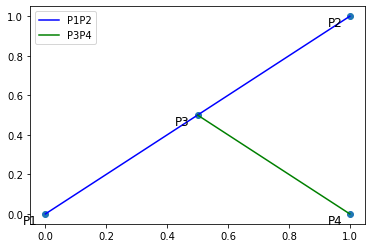

In [7]:
p1 = np.array([0, 0])
p2 = np.array([1, 1])
p3 = np.array([0.5, 0.5])
p4 = np.array([1, 0])

intersection(p1,p2,p3,p4)

### Edit the last code and plot the intersect point 

In [8]:
def determinant(p1,p2,p3,p4):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x4, y4 = p4
    return(x1+x2)*(y4-y3) - (y1+y2)*(x4-x3)

def intersection_point(p1,p2,p3,p4):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    x4, y4 = p4
    interse = intersection(p1,p2,p3,p4)
    
    if interse:
            
            det = determinant(p1,p2,p3,p4)
            alpha = ((y4-y3)*(x2-x4)-(x4-x3)*(y2-y1))/det
            beta = ((-y1-y2)*(x2-x4)+(x1+x2)*(y2-y1))/det
            
            x = alpha * x1 +(1-alpha)*x2
            y = alpha *y1 +(1-alpha)*y2
            
            pin=np.array([x,y])
            pintar_segmentos(p1,p2,p3,p4,pin)

los segmentos se cruzan


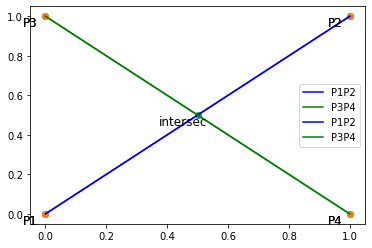

In [9]:
p1 = np.array([0, 0])
p2 = np.array([1, 1])
p3 = np.array([0, 1])
p4 = np.array([1, 0])


intersection_point(p1,p2,p3,p4)

## lets calculate the convex hull of a set of points and graph the results



In [10]:
from matplotlib import pyplot as plt
from random import randint
from math import atan2

def create_points(ct,min=0,max=50):
    return [[randint(min,max),randint(min,max)]for _ in range(ct)]
 
def scatter_plot(coords,convex_hull=None):
    xs,ys = zip(*coords)
    plt.scatter(xs,ys)
    if convex_hull != None:
        for i in range(1,len(convex_hull)+1):
            if i == len(convex_hull):i=0
            c0 = convex_hull[i-1]
            c1 = convex_hull[i]
            plt.plot((c0[0],c1[0]),(c0[1],c1[1]),'r')
    plt.show()
def polar_angle(p0,p1=None):
    if p1 ==None: p1=anchor
    y_span=p0[1]-p1[1]
    x_span=p0[0]-p1[0]
    
    return atan2(y_span,x_span) 

def distance(p0,p1=None):
    if p1 ==None: p1=anchor
    y_span=p0[1]-p1[1]
    x_span=p0[0]-p1[0]
    return y_span**2 + x_span**2

def quicksort(a):
    if len(a)<=1: return a
    smaller,equal,larger=[],[],[]
    piv_ang=polar_angle(a[randint(0,len(a)-1)]) #tomando u punto cualquiera y calcular su polar_angle
    
    for pt in a:
        pt_ang = polar_angle(pt)
        if pt_ang<piv_ang:smaller.append(pt)
        elif pt_ang==piv_ang:equal.append(pt)
        else:               larger.append(pt)
    return quicksort(smaller) + sorted(equal,key=distance)\
            +quicksort(larger)

def cross_product(p0,p1,p2):
    x1 = p1[0] - p0[0]
    y1 = p1[1] - p0[1]
    x2 = p2[0] - p0[0]
    y2 = p2[1] - p0[1]
    return (x1*y2) - (x2*y1)


def graham_scan(points,show_progress=False):
    global anchor
    min_idx=None
    for i,(x,y) in enumerate(points):
        if min_idx==None or y<points[min_idx][1]:
            min_idx=i
        if y==points[min_idx][i]and x<points[min_idx][0]:
            min_idx=i
        anchor=points[min_idx]
        sorted_pts=quicksort(points)
        del sorted_pts[sorted_pts.index(anchor)]
        hull=[anchor,sorted_pts[0]]
        for s in sorted_pts[1:]:
            while cross_product(hull[-2],hull[-1],s)<= 0:
                del hull[-1]
                if len(hull)<2:break
            hull.append(s)
            
            if show_progress: scatter_plot(points,hull)
        return hull

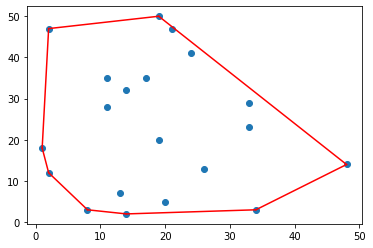

In [11]:
points = create_points(20)
hull=graham_scan(points,False)
scatter_plot(points,hull)

### implementación del sweep line 

In [12]:
# vamos a suponer que recibimos una lista P de puntos los cuales cada dos puntos
# significa un segmento que evluar
class queue(self,pts):
    def __init__(self,pts):
        self.upper = [x[0] for x in pts]
        self.lower = [y[1] for y in pts]
        
    def order(self,pts):
        q_order = []
        q_order.extend(pts[0],pts[1])
        
        
        
        

NameError: name 'pts' is not defined

In [22]:
q_order=[] 
q_order.extend((points[0],points[1]))

for i,(x,y) in points:
    print (i,x,y)

TypeError: cannot unpack non-iterable int object